# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
import sys
!{sys.executable} -m pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=88d6af634f1faba8ae60c69531eb66679a3ee49c3e863645e144438bdfba0c95
  Stored in directory: c:\users\michelle\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import datetime
from config import api_key 
from citipy import citipy

## Generate Cities List

In [76]:
cities = []

#use citipy to find nearest city for random latitudes and longitudes. Don't stop 'til you get enough.
while len(cities) < 600:
    lat = np.random.randint(-90,90)
    long = np.random.randint(-180,180) 
    city = citipy.nearest_city(lat,long)
    
    if city not in cities:
        cities.append(city)

print(len(cities))            

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
#Create empty lists for API call data collection and subsequent dataframe
found_cities = []
city_latitude = []
city_longitude =[]
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date_of_call = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("------------------------")
for i in range(len(cities)):
    search_city = cities[i].city_name.strip("()''")
    search_country = cities[i].country_code.strip("()''")
    url=str(base_url + "q=" + search_city + "," + search_country + "&units=metric&appid=" + api_key)
    try:
        json_response = requests.get(url).json()
        print(f"Processing Record {i} | City:" + str(json_response["name"]))
        found_cities.append(json_response["name"])
        city_latitude.append(json_response["coord"]["lat"])
        city_longitude.append(json_response["coord"]["lon"])
        city_max_temp.append(json_response["main"]["temp_max"])
        city_humidity.append(json_response["main"]["humidity"])
        city_cloudiness.append(json_response["clouds"]["all"])
        city_windspeed.append(json_response["wind"]["speed"])
        city_country.append(json_response["sys"]["country"])
        date_of_call.append(json_response["dt"])
    except KeyError:
        print("City Not Found. Skipping...")
    

Beginning Data Retrieval
------------------------
Processing Record 0 | City:Hobart
Processing Record 1 | City:Hilo
Processing Record 2 | City:Qaanaaq
Processing Record 3 | City:Flin Flon
Processing Record 4 | City:Punta Arenas
Processing Record 5 | City:Longyearbyen
City Not Found. Skipping...
Processing Record 7 | City:Tessalit
City Not Found. Skipping...
Processing Record 9 | City:Puerto Ayora
Processing Record 10 | City:Praia
Processing Record 11 | City:Sanghar
City Not Found. Skipping...
Processing Record 13 | City:Albany
Processing Record 14 | City:Rikitea
Processing Record 15 | City:Perelyub
City Not Found. Skipping...
Processing Record 17 | City:Tasiilaq
City Not Found. Skipping...
Processing Record 19 | City:Hennenman
City Not Found. Skipping...
Processing Record 21 | City:Butaritari
Processing Record 22 | City:Bluff
Processing Record 23 | City:Bonavista
City Not Found. Skipping...
Processing Record 25 | City:Cap Malheureux
Processing Record 26 | City:Olafsvik
Processing Recor

Processing Record 220 | City:Pisco
Processing Record 221 | City:Karasjok
City Not Found. Skipping...
Processing Record 223 | City:Misratah
City Not Found. Skipping...
Processing Record 225 | City:Kamenka
Processing Record 226 | City:Shingū
Processing Record 227 | City:Ambulu
Processing Record 228 | City:Firminy
Processing Record 229 | City:Mahébourg
Processing Record 230 | City:Husavik
Processing Record 231 | City:Kłobuck
Processing Record 232 | City:Pirgos
Processing Record 233 | City:Vaitape
Processing Record 234 | City:Luau
Processing Record 235 | City:North Myrtle Beach
Processing Record 236 | City:Touros
Processing Record 237 | City:Marfino
City Not Found. Skipping...
Processing Record 239 | City:Foumban
Processing Record 240 | City:Kaitangata
City Not Found. Skipping...
Processing Record 242 | City:Carahue
Processing Record 243 | City:Birjand
Processing Record 244 | City:Ko Samui
Processing Record 245 | City:Neyshabur
Processing Record 246 | City:São Filipe
Processing Record 247 

Processing Record 441 | City:Bethel
Processing Record 442 | City:Zabol
Processing Record 443 | City:Oddur
Processing Record 444 | City:Aksu
Processing Record 445 | City:Havøysund
Processing Record 446 | City:Assiut
Processing Record 447 | City:Saskylakh
Processing Record 448 | City:Taoudenni
City Not Found. Skipping...
Processing Record 450 | City:Vinhedo
Processing Record 451 | City:Muzhi
Processing Record 452 | City:Wanning
Processing Record 453 | City:Okha
Processing Record 454 | City:Warri
Processing Record 455 | City:Khandyga
Processing Record 456 | City:Colón
Processing Record 457 | City:Charlottetown
Processing Record 458 | City:Kahului
Processing Record 459 | City:Dhidhdhoo
City Not Found. Skipping...
Processing Record 461 | City:Te Anau
Processing Record 462 | City:Turmalina
Processing Record 463 | City:Shintomi
City Not Found. Skipping...
Processing Record 465 | City:Waipawa
Processing Record 466 | City:Zárate
Processing Record 467 | City:Banda Aceh
Processing Record 468 | Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
cities_df = pd.DataFrame({
    "City":found_cities,
    "Lat":city_latitude,
    "Long":city_longitude,
    "Max Temp (C)":city_max_temp,
    "Humidity":city_humidity,
    "Cloudiness":city_cloudiness,
    "Windspeed":city_windspeed,
    "Country Code":city_country,
    "Date":date_of_call 
})

cities_df.to_csv("city_data_27-9",index=False)

cities_df

,City,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Country Code,Date
0,Hobart,-42.88,147.33,15.56,54,20,5.70,AU,1601264934
1,Hilo,19.73,-155.09,27.00,69,20,3.60,US,1601265532
2,Qaanaaq,77.48,-69.36,-11.03,78,37,3.66,GL,1601265709
3,Flin Flon,54.77,-101.86,5.81,83,81,4.10,CA,1601265445
4,Punta Arenas,-53.15,-70.92,6.00,75,20,15.40,CL,1601265709
...,...,...,...,...,...,...,...,...,...
528,Carberry,49.87,-99.36,11.00,66,90,6.20,CA,1601265889
529,Quzhou,28.96,118.87,20.59,85,100,2.33,CN,1601265889
530,Nurota,40.56,65.69,13.00,47,63,3.10,UZ,1601265890
531,Port Macquarie,-31.43,152.92,20.00,44,45,0.89,AU,1601265890


In [83]:
cities_df.describe()

,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,21.627542,19.297336,17.538011,72.724203,49.589118,3.787730,1.601266e+09
std,33.727941,90.440634,9.064390,19.837804,38.278143,2.550803,1.033848e+02
min,-54.800000,-175.200000,-11.030000,8.000000,0.000000,0.100000,1.601265e+09
25%,-6.840000,-59.520000,9.440000,63.000000,9.000000,2.000000,1.601266e+09
50%,24.030000,25.570000,18.870000,78.000000,47.000000,3.290000,1.601266e+09
75%,50.680000,100.350000,25.140000,87.000000,90.000000,5.100000,1.601266e+09
max,78.220000,179.320000,36.000000,100.000000,100.000000,20.800000,1.601266e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [90]:
humid_cities = cities_df.loc[cities_df["Humidity"]>100]
humid_cities

,City,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Country Code,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

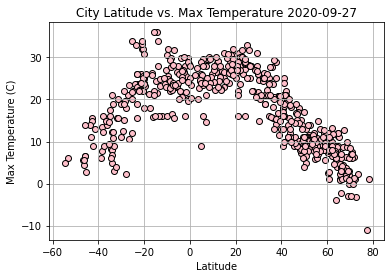

In [115]:
#Convert date timestamp to easy-read date for charting
date_timestamp = cities_df.iloc[1,8]
date = datetime.datetime.fromtimestamp(date_timestamp).strftime('%Y-%m-%d')


lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Max Temp (C)"]
plt.scatter(lat,max_temp,c="pink",edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(axis="both")
plt.savefig("lat_v_temp.png")
plt.show()

## Latitude vs. Humidity Plot

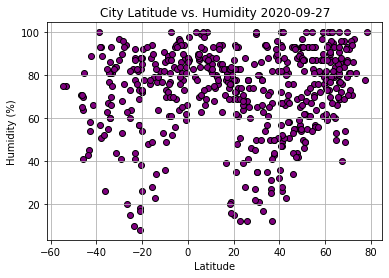

In [116]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Humidity"]
plt.scatter(lat,max_temp,c="purple",edgecolors="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")
plt.savefig("lat_v_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

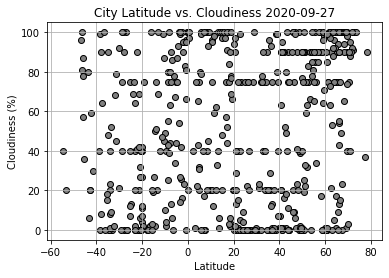

In [117]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Cloudiness"]
plt.scatter(lat,max_temp,c="gray",edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")
plt.savefig("lat_v_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

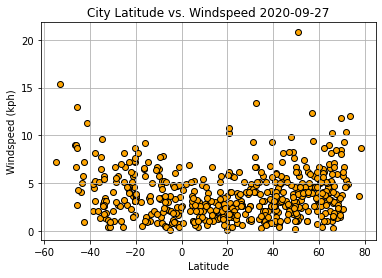

In [118]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Windspeed"]
plt.scatter(lat,max_temp,c="orange",edgecolors="black")
plt.title(f"City Latitude vs. Windspeed {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.grid(axis="both")
plt.savefig("lat_v_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


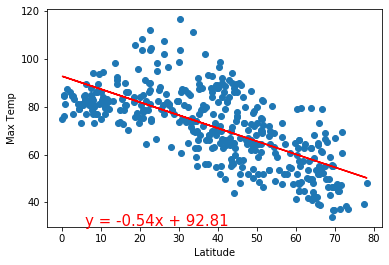

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


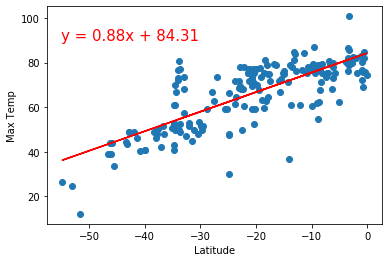

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


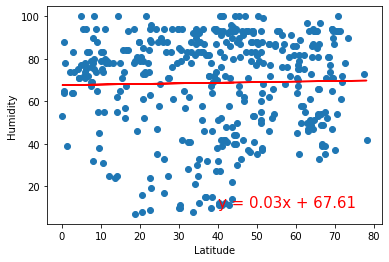

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


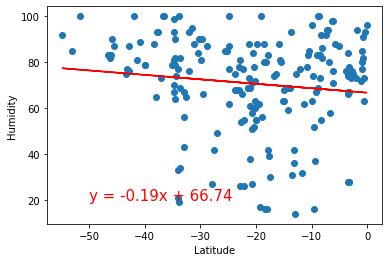

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


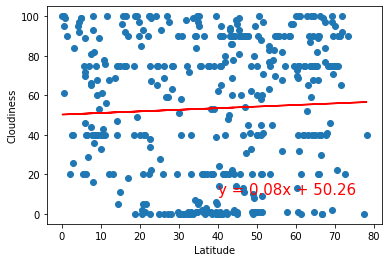

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


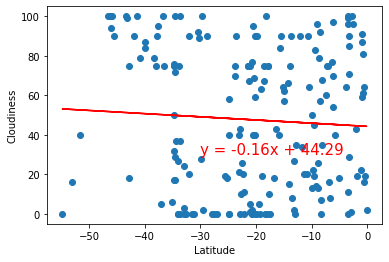

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


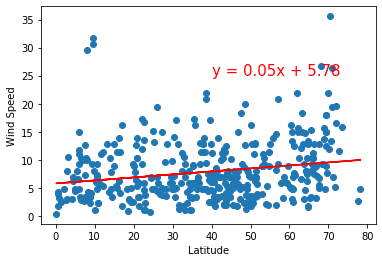

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


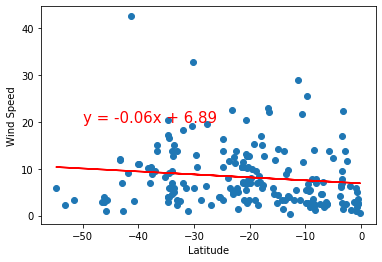